In [64]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [65]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 33.9 MB/s eta 0:00:00a 0:00:01


In [66]:
# Load CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [67]:
# Normalize pixel values to between 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

# Fit the generator to training data (optional but safe)
datagen.fit(x_train)

In [69]:
# Print shapes to confirm
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [70]:
#Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

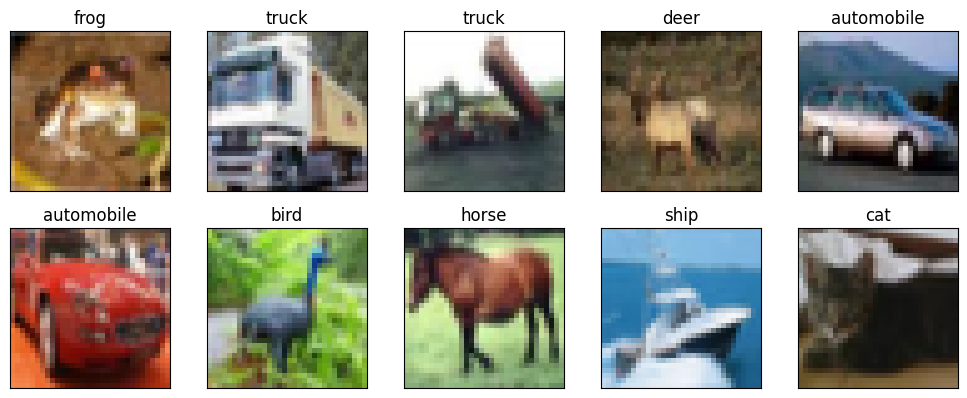

In [71]:
#Plot the first 25 training images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The labels are arrays, so you need y_train[i][0]
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [72]:
# Build a simple CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [73]:
from tensorflow.keras import optimizers

# Use Adam with smaller learning rate
adam = optimizers.Adam(learning_rate=0.0005)

# Compile Model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [74]:
# Train Model
batch_size = 64

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                   steps_per_epoch = x_train.shape[0] //batch_size,
                   epochs = 30, # train longer with augmentation
                   validation_data = (x_test, y_test)) 

Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.2661 - loss: 3.3473 - val_accuracy: 0.4822 - val_loss: 1.4406
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4219 - loss: 1.5638

/Users/mahesyoga/tf-arm-venv/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4219 - loss: 1.5638 - val_accuracy: 0.4824 - val_loss: 1.4382
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4548 - loss: 1.5447 - val_accuracy: 0.5076 - val_loss: 1.4392
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4531 - loss: 1.4062 - val_accuracy: 0.5119 - val_loss: 1.4223
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5216 - loss: 1.3528 - val_accuracy: 0.5323 - val_loss: 1.3873
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6094 - loss: 1.2948 - val_accuracy: 0.5368 - val_loss: 1.3652
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5642 - loss: 1.2423 - val_accuracy: 0.6311 - val_loss: 1.0445
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5469 - loss: 1.2703 - val_accuracy: 0.6310 - val_loss: 1.0361
Epoch 9/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5922 - loss: 1.1737 - val_accuracy: 0.610

In [75]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.7338 - loss: 0.9018

Test accuracy: 0.7337999939918518


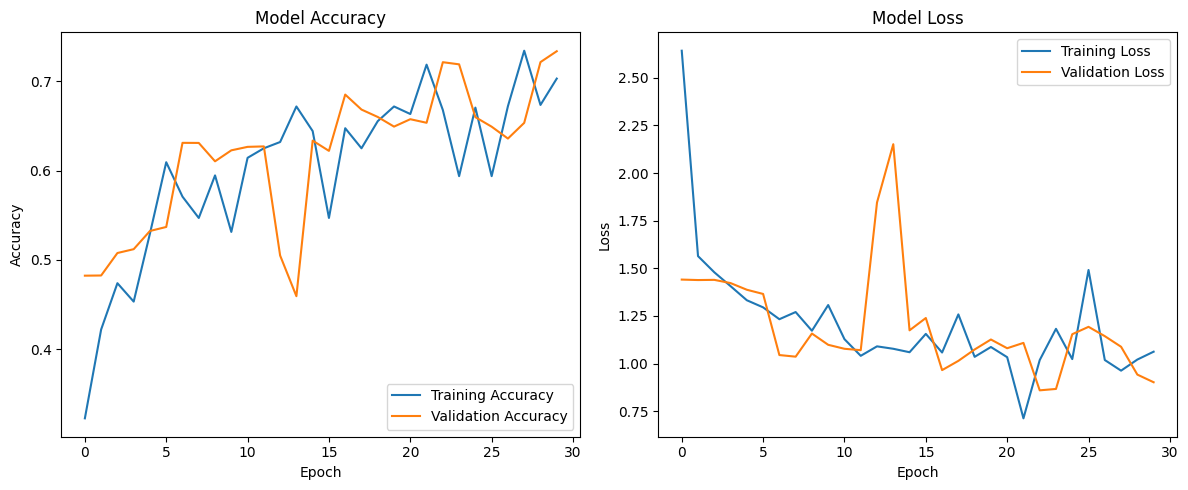

In [76]:
# Plot Training Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()